<a href="https://colab.research.google.com/github/somaharshithareddy/Projectss/blob/main/Cold%20Email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.25
    Uninstalling langchain-core-0.3.25:
      Successfully uninstalled langchain-core-0.3.25


In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    temperature=0,
    groq_api_key='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',
    model_name="llama-3.3-70b-versatile"
)

response = llm.invoke("The first person to land on moon was ...")
print(response.content)

The first person to land on the moon was Neil Armstrong. He stepped out of the lunar module Eagle and onto the moon's surface on July 20, 1969, during the Apollo 11 mission. Armstrong famously declared, "That's one small step for man, one giant leap for mankind," as he became the first human to set foot on the moon.


In [ ]:
!pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.12
    Uninstalling langchain-0.3.12:
      Successfully uninstalled langchain-0.3.12


In [ ]:
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://jobs.nike.com/job/R-48491?from=job%20search%20funnel")
page_data = loader.load().pop().page_content
print(page_data)

Apply for Software Engineer

Search JobsSkip navigationSearch JobsNIKE, INC. JOBSContract JobsJoin The Talent CommunityLife @ NikeOverviewBenefitsBrandsOverviewJordanConverseTeamsOverviewAdministrative SupportAdvanced InnovationAir Manufacturing InnovationAviationCommunicationsCustomer ServiceDesignDigitalFacilitiesFinance & AccountingGovernment & Public AffairsHuman ResourcesInsights & AnalyticsLegalManufacturing & EngineeringMarketingMerchandisingPlanningPrivacyProcurementProduct Creation, Development & ManagementRetail CorporateRetail StoresSalesSocial & Community ImpactSports MarketingStrategic PlanningSupply Chain, Distribution & LogisticsSustainabilityTechnologyLocationsOverviewNike WHQNike New York HQEHQ: Hilversum, The NetherlandsELC: Laakdal, BelgiumGreater China HQDiversity, Equity & InclusionOverviewMilitary InclusionDisability InclusionIndigenous InclusionInternshipsTechnologySoftware EngineerBoston, MassachusettsBecome part of the Converse TeamConverse is a place to explor

In [ ]:
from langchain_core.prompts import PromptTemplate

prompt_extract = PromptTemplate.from_template(
        """
        ### SCRAPED TEXT FROM WEBSITE:
        {page_data}
        ### INSTRUCTION:
        The scraped text is from the career's page of a website.
        Your job is to extract the job postings and return them in JSON format containing the
        following keys: `role`, `experience`, `skills` and `description`.
        Only return the valid JSON.
        ### VALID JSON (NO PREAMBLE):
        """
)

chain_extract = prompt_extract | llm
res = chain_extract.invoke(input={'page_data':page_data})
type(res.content)

str

In [ ]:
from langchain_core.output_parsers import JsonOutputParser

json_parser = JsonOutputParser()
json_res = json_parser.parse(res.content)
json_res

{'role': 'Software Engineer',
 'experience': '5 years of progressive, post-baccalaureate experience in job offered or in an engineering-related occupation. 3 years of experience in: Digital Order Management Systems, Warehouse Management Systems, API Tools, Microservices, 3rd party product integration, Retail and Digital systems, XML, JSON, Python, Order management and fulfillment process, Drop ship process, CommerceHUB platform',
 'skills': ['Digital Order Management Systems',
  'Warehouse Management Systems',
  'API Tools',
  'Microservices',
  '3rd party product integration',
  'Retail and Digital systems',
  'XML',
  'JSON',
  'Python'],
 'description': 'Develop, code, configure, test programs/systems and solutions problems in order to meet defined digital product specifications and direction; develop robust advanced analytics and machine learning solutions that have a direct impact on the business; help design and build scalable software solutions, implement and integrate new techn

In [ ]:
type(json_res)

dict

In [ ]:
import pandas as pd
df = pd.read_csv("my_portfolio.csv")
df

,Techstack,Links
0,"React, Node.js, MongoDB",https://example.com/react-portfolio
1,"Angular,.NET, SQL Server",https://example.com/angular-portfolio
2,"Vue.js, Ruby on Rails, PostgreSQL",https://example.com/vue-portfolio
3,"Python, Django, MySQL",https://example.com/python-portfolio
4,"Java, Spring Boot, Oracle",https://example.com/java-portfolio
5,"Flutter, Firebase, GraphQL",https://example.com/flutter-portfolio
6,"WordPress, PHP, MySQL",https://example.com/wordpress-portfolio
7,"Magento, PHP, MySQL",https://example.com/magento-portfolio
8,"React Native, Node.js, MongoDB",https://example.com/react-native-portfolio
9,"iOS, Swift, Core Data",https://example.com/ios-portfolio


In [ ]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.0 MB/s eta 0:00:00


In [ ]:
import uuid
import chromadb

client = chromadb.PersistentClient('vectorstore')
collection = client.get_or_create_collection(name="portfolio")

if not collection.count():
    for _, row in df.iterrows():
        collection.add(documents=row["Techstack"],
                       metadatas={"links": row["Links"]},
                       ids=[str(uuid.uuid4())])

/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:03<00:00, 27.3MiB/s]


In [ ]:
job = json_res
job['skills']

['Digital Order Management Systems',
 'Warehouse Management Systems',
 'API Tools',
 'Microservices',
 '3rd party product integration',
 'Retail and Digital systems',
 'XML',
 'JSON',
 'Python']

In [ ]:
job

{'role': 'Software Engineer',
 'experience': '5 years of progressive, post-baccalaureate experience in job offered or in an engineering-related occupation. 3 years of experience in: Digital Order Management Systems, Warehouse Management Systems, API Tools, Microservices, 3rd party product integration, Retail and Digital systems, XML, JSON, Python, Order management and fulfillment process, Drop ship process, CommerceHUB platform',
 'skills': ['Digital Order Management Systems',
  'Warehouse Management Systems',
  'API Tools',
  'Microservices',
  '3rd party product integration',
  'Retail and Digital systems',
  'XML',
  'JSON',
  'Python'],
 'description': 'Develop, code, configure, test programs/systems and solutions problems in order to meet defined digital product specifications and direction; develop robust advanced analytics and machine learning solutions that have a direct impact on the business; help design and build scalable software solutions, implement and integrate new techn

In [ ]:
links = collection.query(query_texts=job['skills'], n_results=2).get('metadatas', [])
links

[[{'links': 'https://example.com/magento-portfolio'},
  {'links': 'https://example.com/android-portfolio'}],
 [{'links': 'https://example.com/devops-portfolio'},
  {'links': 'https://example.com/magento-portfolio'}],
 [{'links': 'https://example.com/ml-python-portfolio'},
  {'links': 'https://example.com/flutter-portfolio'}],
 [{'links': 'https://example.com/xamarin-portfolio'},
  {'links': 'https://example.com/magento-portfolio'}],
 [{'links': 'https://example.com/xamarin-portfolio'},
  {'links': 'https://example.com/angular-portfolio'}],
 [{'links': 'https://example.com/magento-portfolio'},
  {'links': 'https://example.com/wordpress-portfolio'}],
 [{'links': 'https://example.com/magento-portfolio'},
  {'links': 'https://example.com/wordpress-portfolio'}],
 [{'links': 'https://example.com/ml-python-portfolio'},
  {'links': 'https://example.com/full-stack-js-portfolio'}],
 [{'links': 'https://example.com/ml-python-portfolio'},
  {'links': 'https://example.com/python-portfolio'}]]

In [ ]:
prompt_email = PromptTemplate.from_template(
        """
        ### JOB DESCRIPTION:
        {job_description}

        ### INSTRUCTION:
        You are Mohan, a business development executive at AtliQ. AtliQ is an AI & Software Consulting company dedicated to facilitating
        the seamless integration of business processes through automated tools.
        Over our experience, we have empowered numerous enterprises with tailored solutions, fostering scalability,
        process optimization, cost reduction, and heightened overall efficiency.
        Your job is to write a cold email to the client regarding the job mentioned above describing the capability of AtliQ
        in fulfilling their needs.
        Also add the most relevant ones from the following links to showcase Atliq's portfolio: {link_list}
        Remember you are Mohan, BDE at AtliQ.
        Do not provide a preamble.
        ### EMAIL (NO PREAMBLE):

        """
        )

chain_email = prompt_email | llm
res = chain_email.invoke({"job_description": str(job), "link_list": links})
print(res.content)

Subject: Expert Software Engineering Solutions for Your Business Needs

Dear Hiring Manager,

I came across your job posting for a Software Engineer and was impressed by the role's requirements, which align perfectly with AtliQ's capabilities. As a business development executive at AtliQ, an AI & Software Consulting company, I'd like to introduce you to our expertise in facilitating seamless integration of business processes through automated tools.

With our extensive experience in empowering numerous enterprises with tailored solutions, we can help you develop, code, configure, test programs/systems, and solutions to meet your defined digital product specifications. Our team is well-versed in Digital Order Management Systems, Warehouse Management Systems, API Tools, Microservices, 3rd party product integration, Retail and Digital systems, XML, JSON, and Python.

We've had the opportunity to work on various projects that demonstrate our capabilities in software engineering. Some of ou

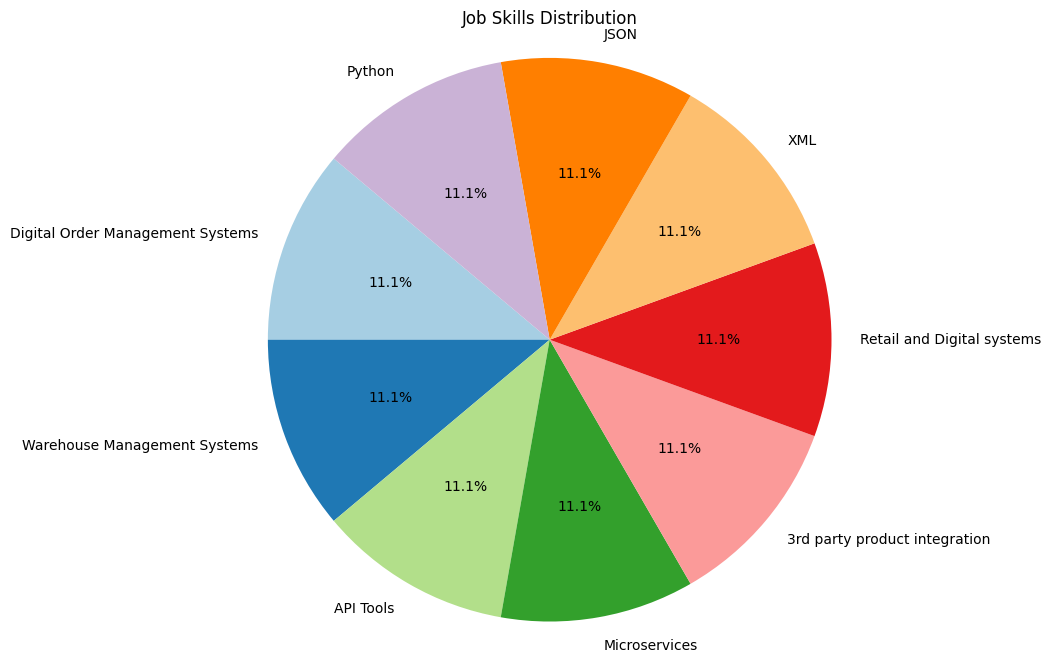

In [ ]:
import matplotlib.pyplot as plt

# Assuming job_skills is a list of skills (from JSON response)
job_skills = json_res.get("skills", [])  # Example: ["Python", "SQL", "Machine Learning", "Python"]

# Count occurrences of each skill
skill_counts = {}
for skill in job_skills:
    skill = skill.strip()  # Remove any extra whitespace
    skill_counts[skill] = skill_counts.get(skill, 0) + 1

# Data for the pie chart
labels = skill_counts.keys()
sizes = skill_counts.values()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Job Skills Distribution")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


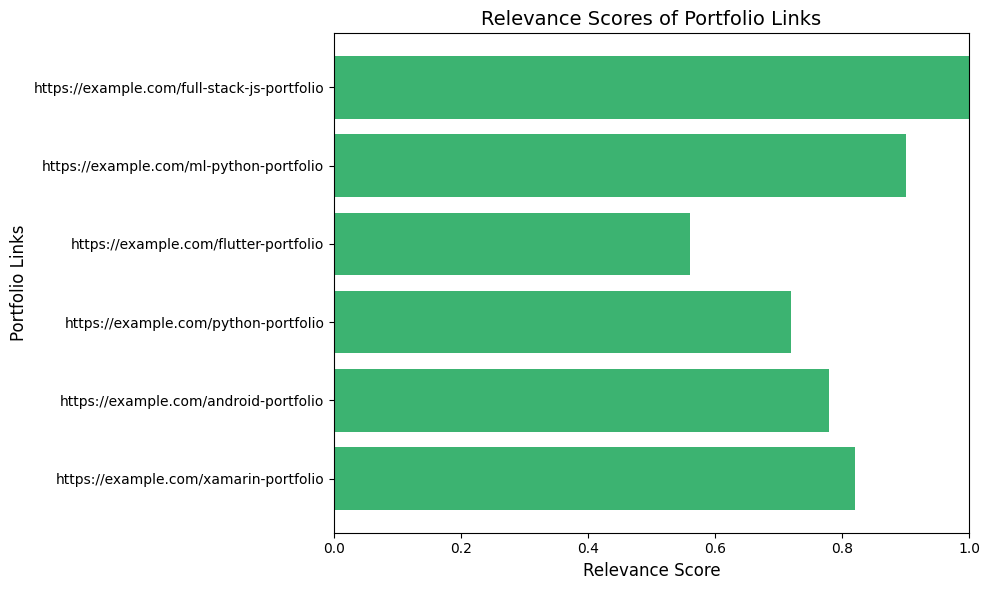

In [ ]:
import matplotlib.pyplot as plt

# Simulated ChromaDB query result for portfolio links and relevance scores
# Replace this with `links` from your actual ChromaDB query result
links_with_scores = [
    {"link": "https://example.com/xamarin-portfolio", "score": 0.82},
    {"link": "https://example.com/android-portfolio", "score": 0.78},
    {"link": "https://example.com/python-portfolio", "score": 0.72},
      {"link": "https://example.com/flutter-portfolio", "score": 0.56},
      {"link": "https://example.com/ml-python-portfolio", "score": 0.9},
      {"link": "https://example.com/full-stack-js-portfolio", "score": 1.0},
]

# Extract links and scores
links = [entry["link"] for entry in links_with_scores]
scores = [entry["score"] for entry in links_with_scores]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(links, scores, color='mediumseagreen')
plt.xlabel("Relevance Score", fontsize=12)
plt.ylabel("Portfolio Links", fontsize=12)
plt.title("Relevance Scores of Portfolio Links", fontsize=14)
plt.xlim(0, 1)  # Scores range from 0 to 1
plt.tight_layout()  # Adjust layout to fit labels
plt.show()
